# 프로젝트 개요
- 강의명 : (산대특)_공공데이터 활용 빅데이터 분석 및 시각화 전문가 과정 육성
- 교과목명 : 빅데이터 기반 딥러닝
- 프로젝트 주제 : CNN 알고리즘을 활용하여 개와 고양이를 구분하는 딥러닝 코드를 작성한다. 
- 프로젝트 마감일 : 2022년 11월 04일 금요일
- 수강생명 : 홍길동

## 옵션
- 한글 서체 설치

In [ ]:
#한글 서체 설치 # 생략 가능
#실행하려면 다음 코드 앞의 #를 삭제한 후 실행해주세요. 

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,968 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
#설치 후 런타임 > 런타임 다시 시작을 해줘야 합니다. 
#이 과정이 싫다면 건너 뛰어도 상관없습니다. 실행하려면 다음 코드 앞의 #을 삭제해주세요.
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

## 평가 1. 구글 드라이브 연동 및 파일 확인 (10점)
- 구글 드라이브에 data 폴더와 연동하여 실제 데이터가 존재하는지 출력한다. 
  + 처음 4개만 출력한다. 

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/2022/human/산대특/deeplearning/chap5/data/catanddog/"

img_paths = []
for img_path in glob.glob(DATA_PATH + 'train/Cat/*.jpg'):
  img_paths.append(img_path)

img_paths[:4]

['/content/drive/MyDrive/Colab Notebooks/2022/human/산대특/deeplearning/chap5/data/catanddog/train/Cat/14.jpg',
 '/content/drive/MyDrive/Colab Notebooks/2022/human/산대특/deeplearning/chap5/data/catanddog/train/Cat/44.jpg',
 '/content/drive/MyDrive/Colab Notebooks/2022/human/산대특/deeplearning/chap5/data/catanddog/train/Cat/31.jpg',
 '/content/drive/MyDrive/Colab Notebooks/2022/human/산대특/deeplearning/chap5/data/catanddog/train/Cat/7558.jpg']

## 평가 2. 이미지 데이터 시각화 (20점)
- 주어진 이미지 데이터를 2 x 2 배열로 시각화 코드를 작성한다. 
  + 작성 시, 20점
  + 미 작성 시, 0점
  

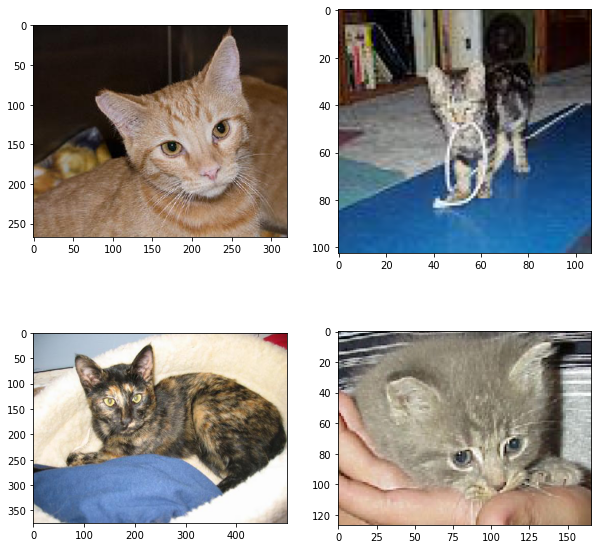

In [3]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

fig = plt.figure(figsize=(10,10))
for i, image in enumerate(img_paths[:4]):
    img = mpimg.imread(image)
    ax = fig.add_subplot(2, 2, i+1)
    ax.imshow(img)

## 평가 3. 사전 훈련된 모델 내려받기 (10점)
- ResNet50 모형을 내려받는다. 
  + 조건 1: 네트워크 상단에 완전연결층은 포함
  + 조건 2: 가중치는 imagnet을 사용한다. 
  + 조건 3: classes 값은 1000으로 지정한다. 
  + 다른 조건은 None으로 처리한다. 
- 변수명은 model로 정의한다. 
- 평가
  + 조건 모두 만족 시, 10점
  + 조건 2개 만족 시, 7점
  + 조건 1개 만족 시, 0점

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = ResNet50(include_top=True,
                 weights="imagenet",
                 input_tensor=None,
                 input_shape=None,
                 pooling=None,
                 classes=1000)

102967424/102967424 [==============================] - 4s 0us/step


- 아래 Total Params와 갯수가 동일해야 한다. 

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

## 평가 4. 네트워크에 밀집층 추가 (10점)
- 앞서 생성된 모델에 이어 밀집층을 추가한다. 
  + 조건 1. 활성화함수는 'sigmoid'를 이용한다. 
  + 조건 2. 출력 갯수는 2를 설정한다. 
- 평가
  + 조건 모두 만족 시 10점
  + 그 외 0점
- 모델 summary() 결과가 동일해야 함
- 변수명은 model로 정의한다. 

In [ ]:
model.trainable = False
model = Sequential([model,
                    Dense(2, activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


## 평가 5. 훈련에 사용될 환경 설정 (10점)
- 모델 컴파일을 위한 코드를 작성한다. 
  + 조건 1. 손실함수는 이진 분류를 위한 함수
  + 조건 2. 옵티마이저는 아담이다. 
  + 조건 3. 평가지표는 정확도이다. 
- 평가
  + 조건 모두 만족 시 10점
  + 그 외 0점

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## 평가 6. 이미지 데이터 증강 (30점)
- 이미지 데이터 학습을 돕는 ImageDataGenerator 클래스를 사용한다.  
  + 조건 1. 구글 드라이브에 있는 train 폴더 내 데이터를 활용하여 이미지를 증강한 뒤, train_generator로 저장한다. 
  + 조건 2. 구글 드라이브에 있는 validation 폴더 내 데이터를 이미지를 증강한 뒤, valid_generator로 저장한다.
- ImageDataGenerator 옵션 내 파라미터는 자유롭게 활용한다. 
  + class_mode = 'categorical'로 지정한다. 
- 평가
  + 조건 모두 만족 시 30점
  + 그 외 0점

In [ ]:
BATCH_SIZE = 32
train_dir = "/content/drive/MyDrive/Colab Notebooks/2022/human/산대특/deeplearning/chap5/data/catanddog/train/"
valid_dir = "/content/drive/MyDrive/Colab Notebooks/2022/human/산대특/deeplearning/chap5/data/catanddog/validation/"

train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(224, 224), #colab에서 inputshape 오류 발생으로, tage_size shape 변경
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


## 평가 7. 모형 학습, 모형 정확도 시각화, 예측 (10점)
- 모형 학습 코드는 아래 코드를 그대로 실행한다. 

In [ ]:
history=model.fit(train_generator,
          epochs=5,
          validation_data=valid_generator,
          verbose=2)

Epoch 1/5
13/13 - 150s - loss: 0.6933 - accuracy: 0.4779 - val_loss: 0.6931 - val_accuracy: 0.5000 - 150s/epoch - 12s/step
Epoch 2/5
13/13 - 6s - loss: 0.6931 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000 - 6s/epoch - 499ms/step
Epoch 3/5
13/13 - 6s - loss: 0.6931 - accuracy: 0.5325 - val_loss: 0.6931 - val_accuracy: 0.5102 - 6s/epoch - 492ms/step
Epoch 4/5
13/13 - 7s - loss: 0.6931 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5000 - 7s/epoch - 565ms/step
Epoch 5/5
13/13 - 8s - loss: 0.6929 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000 - 8s/epoch - 591ms/step


- 모델 정확도 시각화를 작성한다. 
- 평가
  + 작성 시, 10점
  + 미 작성 시, 0점

Text(0.5, 1.0, '오차')

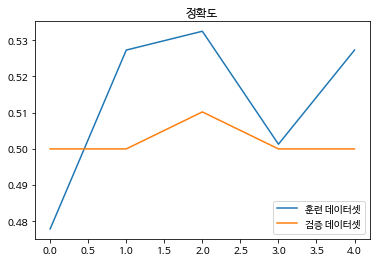

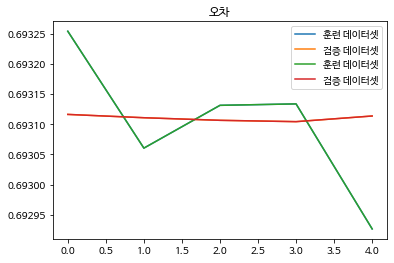

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

- 훈련된 모델의 예측은 아래 코드를 실행한다. 

1/1 [==============================] - 0s 66ms/step


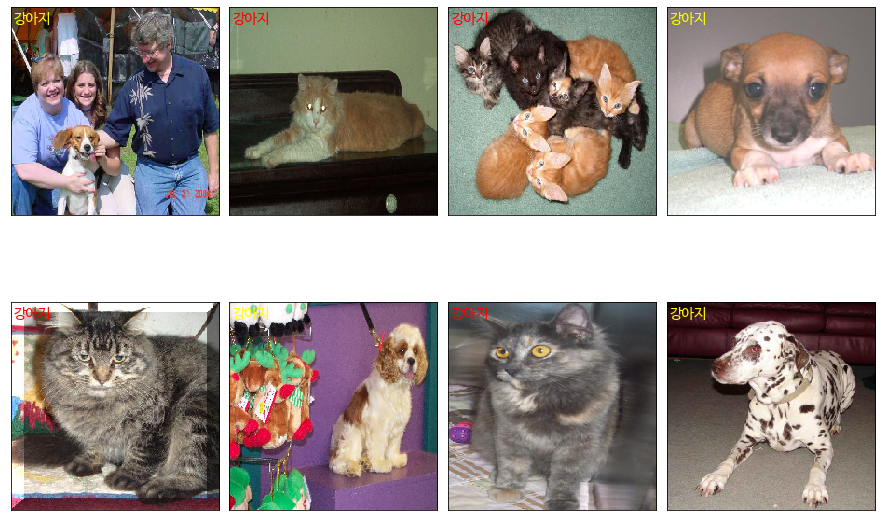

In [ ]:
class_names = ['고양이', '강아지']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)